In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
mmnist_path = Path('../results/SeqVAE/mmnist/')
print(mmnist_path)

../results/SeqVAE/mmnist


coef
- latent: 100 固定
- ch: 8 固定
- coef: {0.01, 0.05, 0.1, 0.5, 1, 1.5, 2.0}

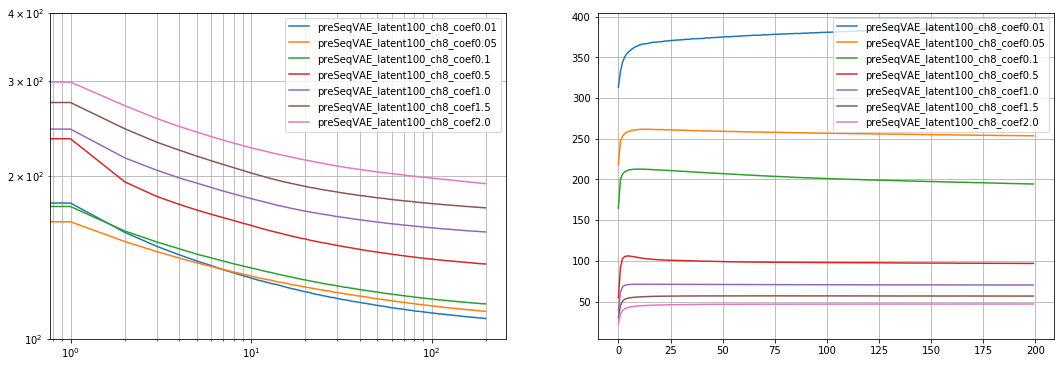

In [92]:
logs = {}
plt.figure(figsize=(18,6))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
for p in sorted(mmnist_path.glob('preSeqVAE_latent100_ch8*')):
    log_path = p.joinpath('log')
    log_df = pd.read_json(log_path)
    ax1.plot(log_df['main/rec_loss'], label=p.name)
    ax2.plot(log_df['main/kl_loss'], label=p.name)

ax1.set_ylim(100, 400)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()
ax2.legend()
ax1.grid(which='both')
ax2.grid()
plt.show()

coef
- latent: 100 固定
- ch: 16 固定
- coef: {0.01, 0.05, 0.1, 0.5, 1, 1.5, 2.0}

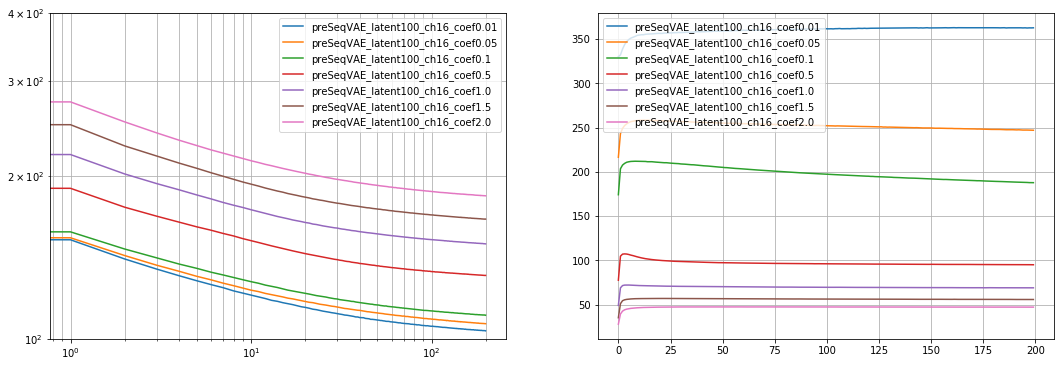

In [93]:
logs = {}
plt.figure(figsize=(18, 6))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
for p in sorted(mmnist_path.glob('preSeqVAE_latent100_ch16*')):
    log_path = p.joinpath('log')
    log_df = pd.read_json(log_path)
    ax1.plot(log_df['main/rec_loss'], label=p.name)
    ax2.plot(log_df['main/kl_loss'], label=p.name)

ax1.set_ylim(100, 400)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend()
ax2.legend()
ax1.grid(which='both')
ax2.grid()
plt.show()

チャネル数
- latent: 100 固定
- ch: {4, 8, 16}
- coef: 0.1 固定

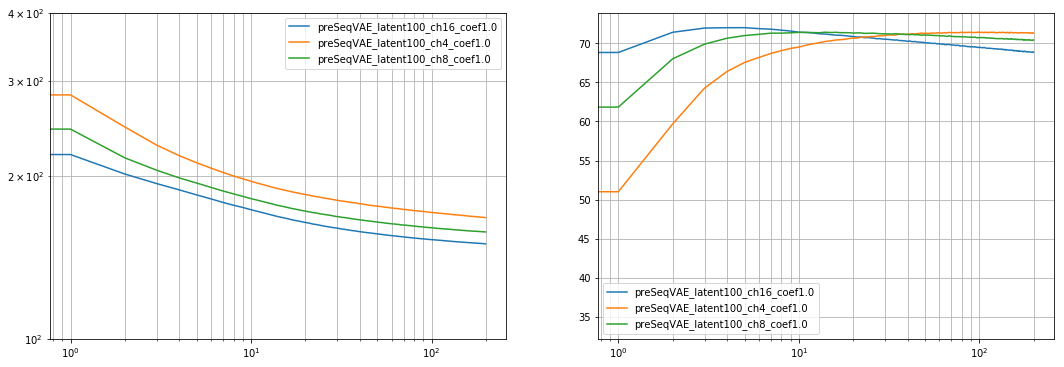

In [98]:
logs = {}
plt.figure(figsize=(18, 6))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
for p in sorted(mmnist_path.glob('preSeqVAE_latent100*_coef1.0')):
    log_path = p.joinpath('log')
    log_df = pd.read_json(log_path)
    ax1.plot(log_df['main/rec_loss'], label=p.name)
    ax2.plot(log_df['main/kl_loss'], label=p.name)

ax1.legend()
ax1.set_ylim(100, 400)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xscale('log')
ax2.legend()
ax1.grid(which='both')
ax2.grid(which='both')
plt.show()

チャネル数
- latent: 200 固定
- ch: {4, 8, 16, 32}
- coef: 0.1 固定

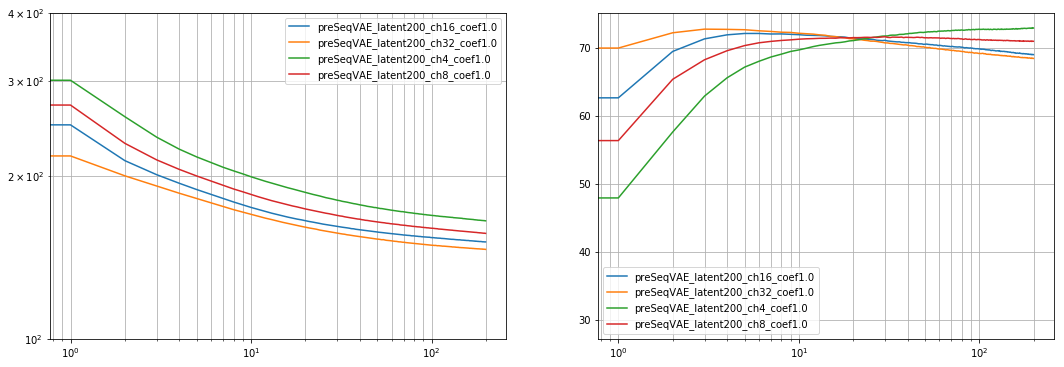

In [97]:
logs = {}
plt.figure(figsize=(18, 6))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
for p in sorted(mmnist_path.glob('preSeqVAE_latent200*')):
    log_path = p.joinpath('log')
    log_df = pd.read_json(log_path)
    ax1.plot(log_df['main/rec_loss'], label=p.name)
    ax2.plot(log_df['main/kl_loss'], label=p.name)

ax1.legend()
ax1.set_ylim(100, 400)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_xscale('log')
ax2.legend()
ax1.grid(which='both')
ax2.grid(which='both')
plt.show()

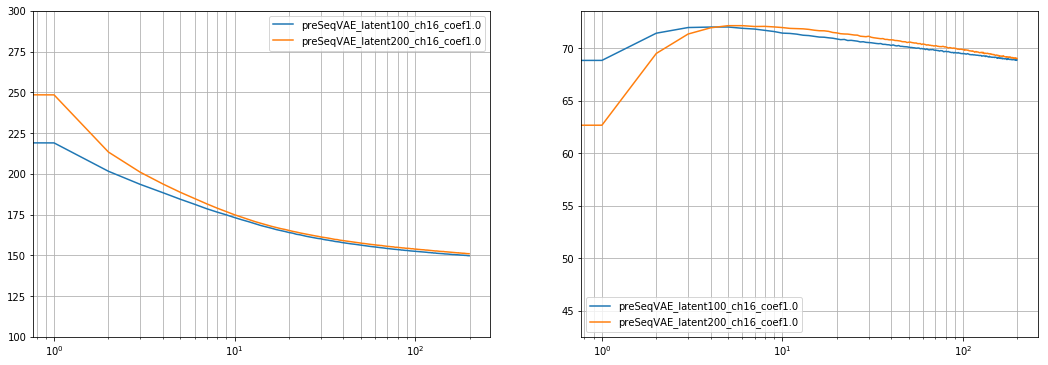

In [109]:
logs = {}
plt.figure(figsize=(18, 6))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
for p in sorted(mmnist_path.glob('preSeqVAE_latent*_ch16_coef1.0')):
    log_path = p.joinpath('log')
    log_df = pd.read_json(log_path)
    ax1.plot(log_df['main/rec_loss'], label=p.name)
    ax2.plot(log_df['main/kl_loss'], label=p.name)

ax1.legend()
ax1.set_ylim(100, 300)
ax1.set_xscale('log')
ax2.set_xscale('log')
ax2.legend()
ax1.grid(which='both')
ax2.grid(which='both')
plt.show()

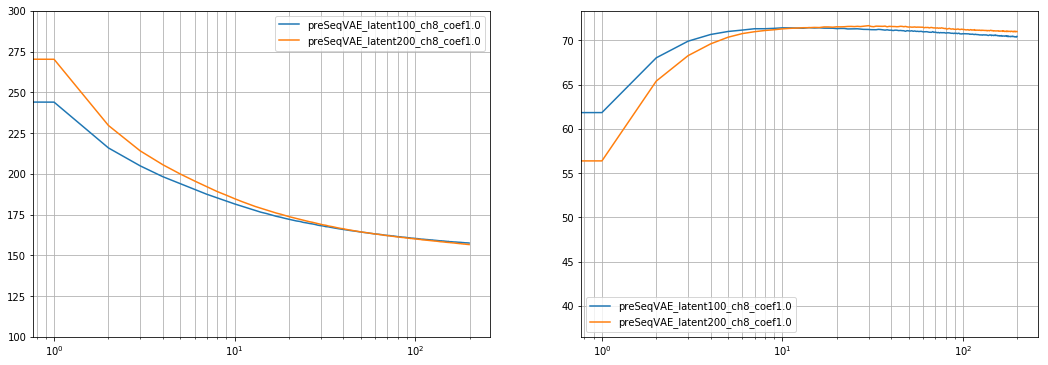

In [112]:
logs = {}
plt.figure(figsize=(18, 6))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
for p in sorted(mmnist_path.glob('preSeqVAE_latent*_ch8_coef1.0')):
    log_path = p.joinpath('log')
    log_df = pd.read_json(log_path)
    ax1.plot(log_df['main/rec_loss'], label=p.name)
    ax2.plot(log_df['main/kl_loss'], label=p.name)

ax1.legend()
ax1.set_ylim(100, 300)
ax1.set_xscale('log')
ax2.set_xscale('log')
ax2.legend()
ax1.grid(which='both')
ax2.grid(which='both')
plt.show()

ざっくりまとめ
- チャネル数を増やすと収束性は悪化するが, なんやかんやで再構築, KLにしても改善するよ
- coefは完全にトレードオフ(再構築 <--> KL)
- latentは増やしてもしゃーない(100, 200は同じ値に収束する)

なので使うパラメータは(ch:16 or 32, coef:1, latent:100)